In [15]:
### 1. Loading Dataset and Plotting images

import pickle
import numpy as np
import matplotlib.pyplot as plt
from random import random
#import random

def unpickle(file):
    with open(file, 'rb') as f:
        dict = pickle.load(f, encoding="latin1")
    return dict

datadict = unpickle('cifar-10-batches-py/data_batch_1')

X = datadict["data"]
Y = datadict["labels"]

print(X.shape)

labeldict = unpickle('cifar-10-batches-py/batches.meta')
label_names = labeldict["label_names"]

X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
Y = np.array(Y)

for i in range(X.shape[0]):
    if random() > 0.999:
        plt.figure(1);
        plt.clf()
        plt.imshow(X[i])
        plt.title(f"Image {i} label={label_names[Y[i]]} (num {Y[i]})")
        plt.pause(1)


# 2. Write a python function class_acc(pred, gt) that computes the classification accuracy for predicted labels 

def class_acc(pred, gt):
    accurate = 0
    for i in range(len(gt)):
        if pred[i] == gt[i]:
            accurate = accurate + 1
    length_gt = float(len(gt))
    return (accurate / length_gt )* 100.0

# 3. Write a function cifar10_classifier_random(x) that returns a random class label for the input data x. 

import random
def cifar10_classifier_random(data):
    list_random = []
   
    for i in range(data.shape[0]):
        num = random.randint(0, 9)
        list_random.append(num)
    return np.array(list_random)


# 4.Write a function cifar10_classifier_1nn(x, trdata, trlabels) that finds the best match of the input vector x in the training set trdata and returns the same label. 


def cifar10_classifier_1nn(x, trdata, trlabels):
    size_trdata = len(trdata)
    distance = np.zeros(size_trdata)
    size = len(trdata)
    for i in range(0, size):
        distance[i] = np.sum(np.subtract(trdata[i], x) ** 2)
    label_test = trlabels[distance.argmin()]
    return label_test 



#5.  Evaluating Classification 


Training_files = ["data_batch_1", "data_batch_2", "data_batch_3", "data_batch_4", "data_batch_5"]
size_Training_files = len(Training_files)
data_img = []
labels_img = []
for i in range(size_Training_files):
    raw_data = unpickle('cifar-10-batches-py/' + Training_files[i])
    data_img.append(raw_data["data"])
    labels_img.append(raw_data["labels"])
train_images = np.concatenate(data_img)
train_images = train_images.astype('int32')
train_classes = np.concatenate(labels_img)
label_dictionary = unpickle('cifar-10-batches-py/batches.meta')
label_names = label_dictionary["label_names"]


# Function 2 
# Checking accuracy of Function 'class_acc'
print('-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*')
print("1. Testing Accuracy of function  1. 'class_acc': ",class_acc(train_classes, train_classes),'%')


# Function 3
# Accuracy of Function "cifar10_classifier_random"
pred_rand_classifier = cifar10_classifier_random(train_images)
print('-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*')
accuracy_result_random = class_acc(pred_rand_classifier, train_classes)
print("2.  Accuracy of function 2 'cifar10_classifier_random': ",accuracy_result_random,'%')
print('-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*')

# Function 4 
# cifar10_classifier_1nn
data_dictionary = unpickle('cifar-10-batches-py/test_batch')
images_X = datadict["data"]
labels_Y = datadict["labels"]
test_images = images_X
test_labels = np.array(labels_Y)
test_images = test_images.astype('int32')
label_dictionary= unpickle('cifar-10-batches-py/batches.meta')
label_names = label_dictionary["label_names"]


pred_label = []
for i in range(0, 10000):

    pred_label.append(cifar10_classifier_1nn(test_images[i], train_images, train_classes))
    
accuracy_result_1nn = class_acc(pred_label, test_labels)
print("3.  Accuracy of function 3 'cifar10_classifier_1nn': ",accuracy_result_1nn,'%')



FileNotFoundError: [Errno 2] No such file or directory: 'cifar-10-batches-py/data_batch_1'

In [14]:
accuracy_result_1nn

NameError: name 'accuracy_result_1nn' is not defined

In [30]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import models, layers
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation,Dropout

# Cifar10=keras.datasets.cifar10 # Loading the dataset
# (xtrain,ytrain),(xtest,ytest)= Cifar10.load_data()
print('---------------------------------------------------------------------------')
print('Shapes of training and Test sets: ')
print('Training set Descriptive Features: ',xtrain.shape)
print('Training set Target Feature: ',ytrain.shape)
print('Test set Descriptive Features: ',xtest.shape)
print('Test set Target Feature: ',ytest.shape)

print('---------------------------------------------------------------------------')
class_names =['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print('class names are: ',class_names)

# One hot Encoding
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)
print('---------------------------------------------------------------------------')
# After one hot Encoding
print('Shapes of training and test sets are:')
print((ytrain.shape, ytrain[0]))
print((ytest.shape, ytest[1]))    


print('---------------------------------------------------------------------------')

# Creating Convolution Neural Netword


# creating an empty sequential model 
model=models.Sequential()
# Adding CNN Layers in the Neural Network with Relu activation function
model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'))
model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'))
# Max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# Second Convolution 
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
# Max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# Third convolutional 
model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#Flatten Layer
model.add(layers.Flatten(input_shape=(32,32))) 
# Classification segment 
model.add(layers.Dense(128, activation='relu')) 
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(80, activation='relu')) 

# Adding final output layer to the neural network
model.add(layers.Dense(10, activation='softmax')) 

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
#model.summary()

# Training the Convolution Neural Network and evaluating the accuracy. 
xtrain2=xtrain.reshape(50000,32,32,3)
xtest2=xtest.reshape(10000,32,32,3)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

model.fit(xtrain2,ytrain,epochs=40,batch_size=56,verbose=True,validation_data=(xtest2,ytest))

train_loss, train_acc = model.evaluate(xtrain2, ytrain)
test_loss, test_acc = model.evaluate(xtest2, ytest)
print('-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*')
print("4. Accuracy of Function 4  'Convolution Neural Network' on Training set:", train_acc*100,'%')
print('-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*')
print("5. Accuracy of Function 4  'Convolution Neural Network' on Test set:", test_acc*100,'%')

---------------------------------------------------------------------------
Shapes of training and Test sets: 
Training set Descriptive Features:  (50000, 32, 32, 3)
Training set Target Feature:  (50000, 10, 2, 2, 2, 2, 2)
Test set Descriptive Features:  (10000, 32, 32, 3)
Test set Target Feature:  (10000, 10, 2, 2, 2, 2, 2)
---------------------------------------------------------------------------
class names are:  ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
---------------------------------------------------------------------------
Shapes of training and test sets are:
((50000, 10, 2, 2, 2, 2, 2, 2), array([[[[[[[0., 1.],
            [1., 0.]],

           [[1., 0.],
            [0., 1.]]],


          [[[1., 0.],
            [0., 1.]],

           [[0., 1.],
            [1., 0.]]]],



         [[[[1., 0.],
            [0., 1.]],

           [[0., 1.],
            [1., 0.]]],


          [[[0., 1.],
            [1., 0.]],

           [

In [28]:
print((ytrain.shape, ytrain[0]))
print((ytest.shape, ytest[1])) 

((50000, 10, 2, 2, 2, 2), array([[[[[0., 1.],
          [1., 0.]],

         [[1., 0.],
          [0., 1.]]],


        [[[1., 0.],
          [0., 1.]],

         [[0., 1.],
          [1., 0.]]]],



       [[[[0., 1.],
          [1., 0.]],

         [[1., 0.],
          [0., 1.]]],


        [[[1., 0.],
          [0., 1.]],

         [[0., 1.],
          [1., 0.]]]],



       [[[[0., 1.],
          [1., 0.]],

         [[1., 0.],
          [0., 1.]]],


        [[[1., 0.],
          [0., 1.]],

         [[0., 1.],
          [1., 0.]]]],



       [[[[0., 1.],
          [1., 0.]],

         [[1., 0.],
          [0., 1.]]],


        [[[1., 0.],
          [0., 1.]],

         [[0., 1.],
          [1., 0.]]]],



       [[[[0., 1.],
          [1., 0.]],

         [[1., 0.],
          [0., 1.]]],


        [[[1., 0.],
          [0., 1.]],

         [[0., 1.],
          [1., 0.]]]],



       [[[[0., 1.],
          [1., 0.]],

         [[1., 0.],
          [0., 1.]]],


        [[[1., 0.]

In [4]:
Cifar10=keras.datasets.cifar10 # Loading the dataset

(xtrain,ytrain),(xtest,ytest)= Cifar10.load_data()

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)
print(ytrain)

170498071/170498071 [==============================] - 7s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


There are 60,000 images. We assigned 10,000 to test dataset
Images are black and white and is of 32 x 32 pixels
Train Images: Array of 60,000 images in 32 X 32 pixel
Train Labels: Integer array of 60,000 labels, value between 0 to 9
Test Images: Array of 10,000 images in 32 X 32 pixel
Test Labels: Integer array of 10,000 labels, value between 0 to 9
Each image mapped to a single label
Each integer value in label array represent clothing item

In [5]:
class_names =['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print(class_names)

['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


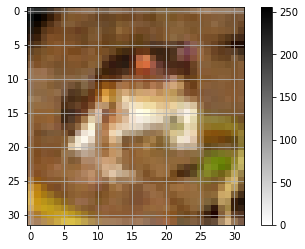

Class ID: [6] and Class name: Frog


In [6]:
index=0 # change this number 
plt.imshow(xtrain[index], cmap=plt.cm.binary) # printing 10th image. You may use cmap='gray'
plt.colorbar() # shows the bar on the right side of the image
plt.grid(True) # will shot the grid
plt.show()
print("Class ID: %s and Class name: %s" % (ytrain[index], class_names[ytrain[index][0]]))

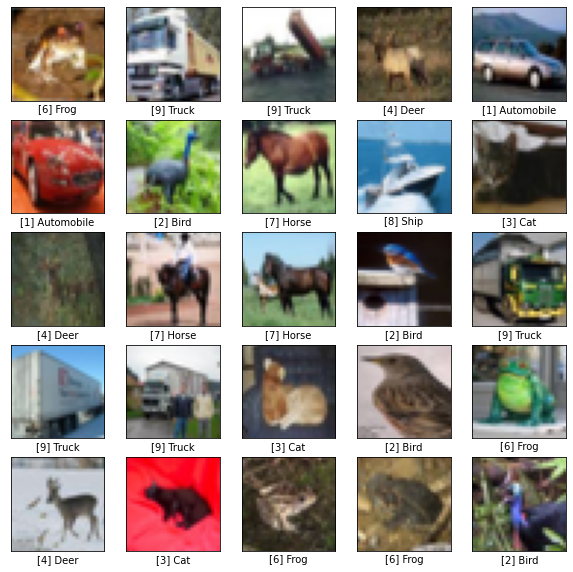

In [7]:
plt.figure(figsize=(10,10))
for i in range(25): # 25 images
  plt.subplot(5,5,i+1) # matrix of 5 X 5 array
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(xtrain[i], cmap=plt.cm.binary) # printing binary/black and white image
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
  plt.xlabel("%s %s" % (ytrain[i], class_names[ytrain[i][0]])) # Assigning name to each image
plt.show()

In [9]:
# Before one hot encoding
print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain))
print("ytest Shape: %s and value: %s" % (ytest.shape, ytest))

ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

# After one hot encoding
print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain[0]))
print("ytest Shape: %s and value: %s" % (ytest.shape, ytest[1]))    

ytrain Shape: (50000, 1) and value: [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
ytest Shape: (10000, 1) and value: [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
ytrain Shape: (50000, 10) and value: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
ytest Shape: (10000, 10) and value: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


2022-10-03 13:06:35.954584: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


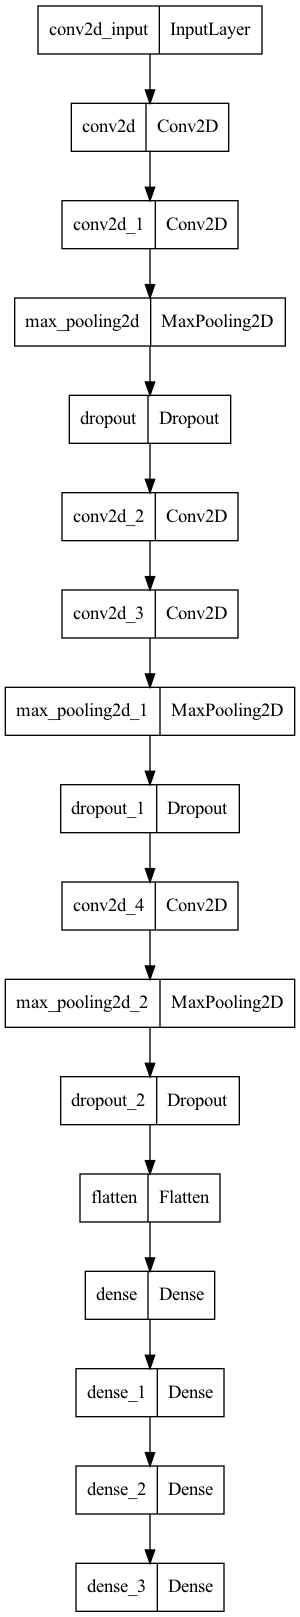

In [10]:
# Modelling - Model on CNN

from tensorflow.keras import models, layers
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation,Dropout

# create a sequential model i.e. empty neural network which has no layers in it.
model=models.Sequential()

#==================== Feature Detection / extraction Block ====================#

# Add first convolutional block - To deal with images we use Conv2D and for colour images and shape use Conv3D
#model.add(layers.Conv2D(filters=6, kernal_size(3,3), input_shape=(32,32,1), activation='relu'))
# in the first block we need to mention input_shape
model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'))
model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'))
# Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Add Second convolutional block
#model.add(layers.Conv2D(filters=6, kernal_size(3,3), activation='relu'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
# Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Add Third convolutional block
#model.add(layers.Conv2D(filters=6, kernal_size(3,3), activation='relu'))
model.add(layers.Conv2D(256,(3,3),activation='relu'))
# model.add(layers.Conv2D(256,(3,3),activation='relu'))
# Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


#==================== Transition Block (from feature detection to classification) ====================#

# Add Flatten layer. Flatten simply converts matrics to array
model.add(layers.Flatten(input_shape=(32,32))) # this will flatten the image and after this Classification happens

#==================== Classification Block ====================#

# Classification segment - fully connected network
# The Dence layer does classification and is deep neural network. Dense layer always accept the array.
model.add(layers.Dense(128, activation='relu')) # as C5 layer in above image. 
model.add(layers.Dense(100, activation='relu')) # as C5 layer in above image. 
model.add(layers.Dense(80, activation='relu')) # as C5 layer in above image. 
# model.add(layers.Dense(60, activation='relu')) # as C5 layer in above image
# model.add(layers.Dense(40, activation='relu')) # as C5 layer in above image
# this 120 is hyper parameter whcih is number of neuron 
#model.add(layers.Dense(84, activation='relu'))# as F6 layer in aboave image

# Add the output layer
model.add(layers.Dense(10, activation='softmax')) # as Output layer in above image. The output layer normally have softmax activation

# Ploting the Model
plot_model(model)

In [11]:
# Compile the model

# if we use softmax activation in output layer then best fit optimizer is categorical_crossentropy
# for sigmoid activation in output layer then loss will be binary_crossentropy

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
# if we do not go for One Hot Encoding then use loss='sparse_categorical_crossentropy'

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       147584    
                                                        

In [12]:
# Training the Convolution Neural Network and evaluating the accuracy. 

xtrain2=xtrain.reshape(50000,32,32,3)
xtest2=xtest.reshape(10000,32,32,3)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

model.fit(xtrain2,ytrain,epochs=40,batch_size=56,verbose=True,validation_data=(xtest2,ytest))

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)
Epoch 1/40
893/893 [==============================] - 357s 398ms/step - loss: 1.9419 - accuracy: 0.2680 - val_loss: 1.6600 - val_accuracy: 0.3969
Epoch 2/40
893/893 [==============================] - 322s 361ms/step - loss: 1.6089 - accuracy: 0.4041 - val_loss: 1.4692 - val_accuracy: 0.4743
Epoch 3/40
893/893 [==============================] - 418s 468ms/step - loss: 1.4378 - accuracy: 0.4776 - val_loss: 1.3615 - val_accuracy: 0.5195
Epoch 4/40
893/893 [==============================] - 309s 346ms/step - loss: 1.3165 - accuracy: 0.5300 - val_loss: 1.2237 - val_accuracy: 0.5691
Epoch 5/40
893/893 [==============================] - 374s 419ms/step - loss: 1.2309 - accuracy: 0.5651 - val_loss: 1.1558 - val_accuracy: 0.6003
Epoch 6/40
893/893 [==============================] - 337s 378ms/step - loss: 1.1529 - accuracy: 0.5957 - val_loss: 1.0848 - val_accuracy: 0.6223
Epoch 7/40
893/893 [==============================] - 322s 360

In [16]:
train_loss, train_acc = model.evaluate(xtrain2, ytrain)

1563/1563 [==============================] - 75s 48ms/step - loss: 0.3876 - accuracy: 0.8822


In [ ]:
test_loss, test_acc = model.evaluate(xtest2, ytest)

In [20]:
print('-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*')
print("4. Accuracy of Function 4  'Convolution Neural Network' on Training set:", train_acc*100,'%')

print('-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*')
print("5. Accuracy of Function 4  'Convolution Neural Network' on Test set:", test_acc*100,'%')

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
4. Accuracy of Function 4  'Convolution Neural Network' on Training set: 88.22000026702881 %
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
5. Accuracy of Function 4  'Convolution Neural Network' on Test set: 76.0200023651123 %
